In [28]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv("../data/final_data.csv")
print(f"Dataset loaded: {len(df)} accidents")
print(f"Columns: {len(df.columns)}")

Dataset loaded: 115 accidents
Columns: 40


In [30]:
df.columns

Index(['title', 'date_published', 'date_modified', 'content', 'road', 'town',
       'location', 'all_text', 'fatalities_mentioned', 'fatalities_count',
       'vehicles', 'accident_types', 'hospital', 'injuries', 'brands', 'day',
       'time', 'age', 'latitude', 'longitude', 'hourly_temperature_2m',
       'hourly_precipitation', 'hourly_rain', 'hourly_showers',
       'hourly_visibility', 'hourly_windspeed_10m', 'hourly_winddirection_10m',
       'daily_weather_code', 'daily_rain_sum', 'daily_wind_gusts_10m_max',
       'daily_wind_speed_10m_max', 'daily_wind_direction_10m_dominant',
       'weather_matched_hour_utc', 'injuries_list', 'hour', 'month',
       'month_name', 'month_num', 'vehicles_list', 'hourly_visibility_km'],
      dtype='object')

In [31]:
df

,title,date_published,date_modified,content,road,town,location,all_text,fatalities_mentioned,fatalities_count,...,daily_wind_speed_10m_max,daily_wind_direction_10m_dominant,weather_matched_hour_utc,injuries_list,hour,month,month_name,month_num,vehicles_list,hourly_visibility_km
0,Collision between a car and a motorbike in Żur...,2025-10-09,2025-10-09,"Today, at around 0930hrs, the Police were info...",Triq il-Belt Valletta,Iż-Żurrieq,"('Triq il-Belt Valletta', 'Iż-Żurrieq')",Collision between a car and a motorbike in Żur...,False,NaN,...,12.574260,258.461548,2025-10-09 22:00:00+00:00,[],9,2025-10-01,Oct,10,"['Car', 'Motorcycle']",52.96
1,Car-motorcycle traffic accident,2025-06-20,2025-06-20,"Yesterday, at around 1830hrs, the Police were ...",Triq Dawret il-Gudja,Il-Gudja,"('Triq Dawret il-Gudja', 'Il-Gudja')","Car-motorcycle traffic accident Yesterday, at ...",False,NaN,...,10.080000,346.301239,2025-06-20 22:00:00+00:00,['Grievous'],18,2025-06-01,Jun,6,"['Car', 'Motorcycle']",33.80
2,Car-motorcycle collision in Ħal Qormi,2025-05-12,2025-05-12,"Today, at around 0800hrs, the Police were info...",Valley Road,Ħal Qormi,"('Valley Road', 'Ħal Qormi')","Car-motorcycle collision in Ħal Qormi Today, a...",False,NaN,...,18.598450,334.419128,2025-05-12 22:00:00+00:00,['Grievous'],8,2025-05-01,May,5,"['Car', 'Motorcycle']",20.30
3,Collision between motorcycle and car in Għaxaq,2025-07-30,2025-07-30,"Yesterday, at around 1800hrs, the Police were ...",Triq Dawret Ħal Għaxaq,Ħal Ghaxaq,"('Triq Dawret Ħal Għaxaq', 'Ħal Ghaxaq')",Collision between motorcycle and car in Għaxaq...,False,NaN,...,18.532133,304.318237,2025-07-30 22:00:00+00:00,['Grievous'],18,2025-07-01,Jul,7,"['Car', 'Motorcycle']",25.44
4,Car-motorcycle collision,2025-04-07,2025-04-07,"Yesterday, at around quarter to nine in the ev...",Triq il-Buqana,Ir-Rabat,"('Triq il-Buqana', 'Ir-Rabat')","Car-motorcycle collision Yesterday, at around ...",False,NaN,...,25.849905,70.311134,2025-04-07 22:00:00+00:00,['Grievous'],20,2025-04-01,Apr,4,"['Car', 'Motorcycle']",46.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Motorcycle accident in Attard,2025-02-05,2025-02-05,"A 52-year-old man and residing in Ħaż-Żebbuġ, ...",Vjal L-Istadium Nazzjonali in Ta' Qali,Ħ'Attard,"(""Vjal L-Istadium Nazzjonali in Ta' Qali"", ""Ħ'...",Motorcycle accident in Attard A 52-year-old ma...,False,NaN,...,13.276144,74.127525,2025-02-05 22:00:00+00:00,['Grievous'],9,2025-02-01,Feb,2,['Motorcycle'],5.66
111,Naxxar traffic accident,2024-12-19,2024-12-19,"Today, at around 1045hrs, the Police were info...",Triq il-Ġermanja,In-Naxxar,"('Triq il-Ġermanja', 'In-Naxxar')","Naxxar traffic accident Today, at around 1045h...",False,NaN,...,20.674158,282.561737,2024-12-19 22:00:00+00:00,[],10,2024-12-01,Dec,12,['Car'],43.52
112,Żebbuġ traffic accident,2025-03-16,2025-03-16,"Today, at around 0800hrs, the Police were info...",Vjal il-Helsien,Ħaż-Żebbuġ,"('Vjal il-Helsien', 'Ħaż-Żebbuġ')","Żebbuġ traffic accident Today, at around 080...",False,NaN,...,23.441502,313.701691,2025-03-16 22:00:00+00:00,"['Slight', 'Grievous']",8,2025-03-01,Mar,3,['Motorcycle'],33.52
113,Collision between a car and e-scooter,2025-07-18,2025-07-18,"Yesterday, at around 2215 hrs, the Police were...",Triq il-Wied ta' Birkirkara,Birkirkara,"(""Triq il-Wied ta' Birkirkara"", 'Birkirkara')",Collision between a car and e-scooter Yesterda...,False,NaN,...,19.174856,317.652130,2025-07-18 22:00:00+00:00,['Grievous'],22,2025-07-01,Jul,7,"['Car', 'Scooter']",15.26


In [32]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

In [33]:
severity_map = {
    "Slight": 1,
    "Serious": 2,
    "Grievous": 3
}

import pandas as pd
import ast

def encode_severity(cell):
    # Handle NaN
    if pd.isna(cell):
        return 0

    # Convert string representation of list to actual list
    if isinstance(cell, str):
        try:
            values = ast.literal_eval(cell)
        except Exception:
            values = [cell]
    else:
        values = cell

    # Empty list
    if not values:
        return 0

    # Return max severity found
    return max(severity_map.get(v, 0) for v in values)


# Apply to the whole dataframe column
df["severity_score"] = df["injuries"].apply(encode_severity)

In [34]:
# Display target distribution
print("\n📈 Severity Score Distribution:")
severity_counts = df['severity_score'].value_counts().sort_index()
severity_labels = {0: 'No injury', 1: 'Slight', 2: 'Serious', 3: 'Grievous'}
for score, count in severity_counts.items():
    pct = count / len(df) * 100
    print(f"   {score} ({severity_labels.get(score, 'Unknown')}): {count} ({pct:.1f}%)")


📈 Severity Score Distribution:
   0 (No injury): 22 (19.1%)
   1 (Slight): 2 (1.7%)
   2 (Serious): 13 (11.3%)
   3 (Grievous): 78 (67.8%)



🔧 Feature Engineering...
   Vehicle types found: ['Bus', 'Motorcycle', 'Bike', 'Car', 'Truck', 'Pedestrian', 'Van', 'Vehicle', 'Scooter']
   Total features: 33
   Feature matrix shape: (115, 33)

🌲 Building Random Forest Model...
   Training set: 86 samples
   Test set: 29 samples

   Cross-validation accuracy: 0.617 (+/- 0.065)

📊 MODEL PERFORMANCE
--------------------------------------------------
   Accuracy: 0.552
   F1-Score (weighted): 0.516

   Classification Report:
              precision    recall  f1-score   support

   No injury       0.17      0.17      0.17         6
     Serious       0.00      0.00      0.00         3
    Grievous       0.65      0.75      0.70        20

    accuracy                           0.55        29
   macro avg       0.27      0.31      0.29        29
weighted avg       0.48      0.55      0.52        29


RESEARCH QUESTION 1: What factors predict accident severity?

🏆 TOP 15 MOST IMPORTANT FEATURES:
------------------------------------------

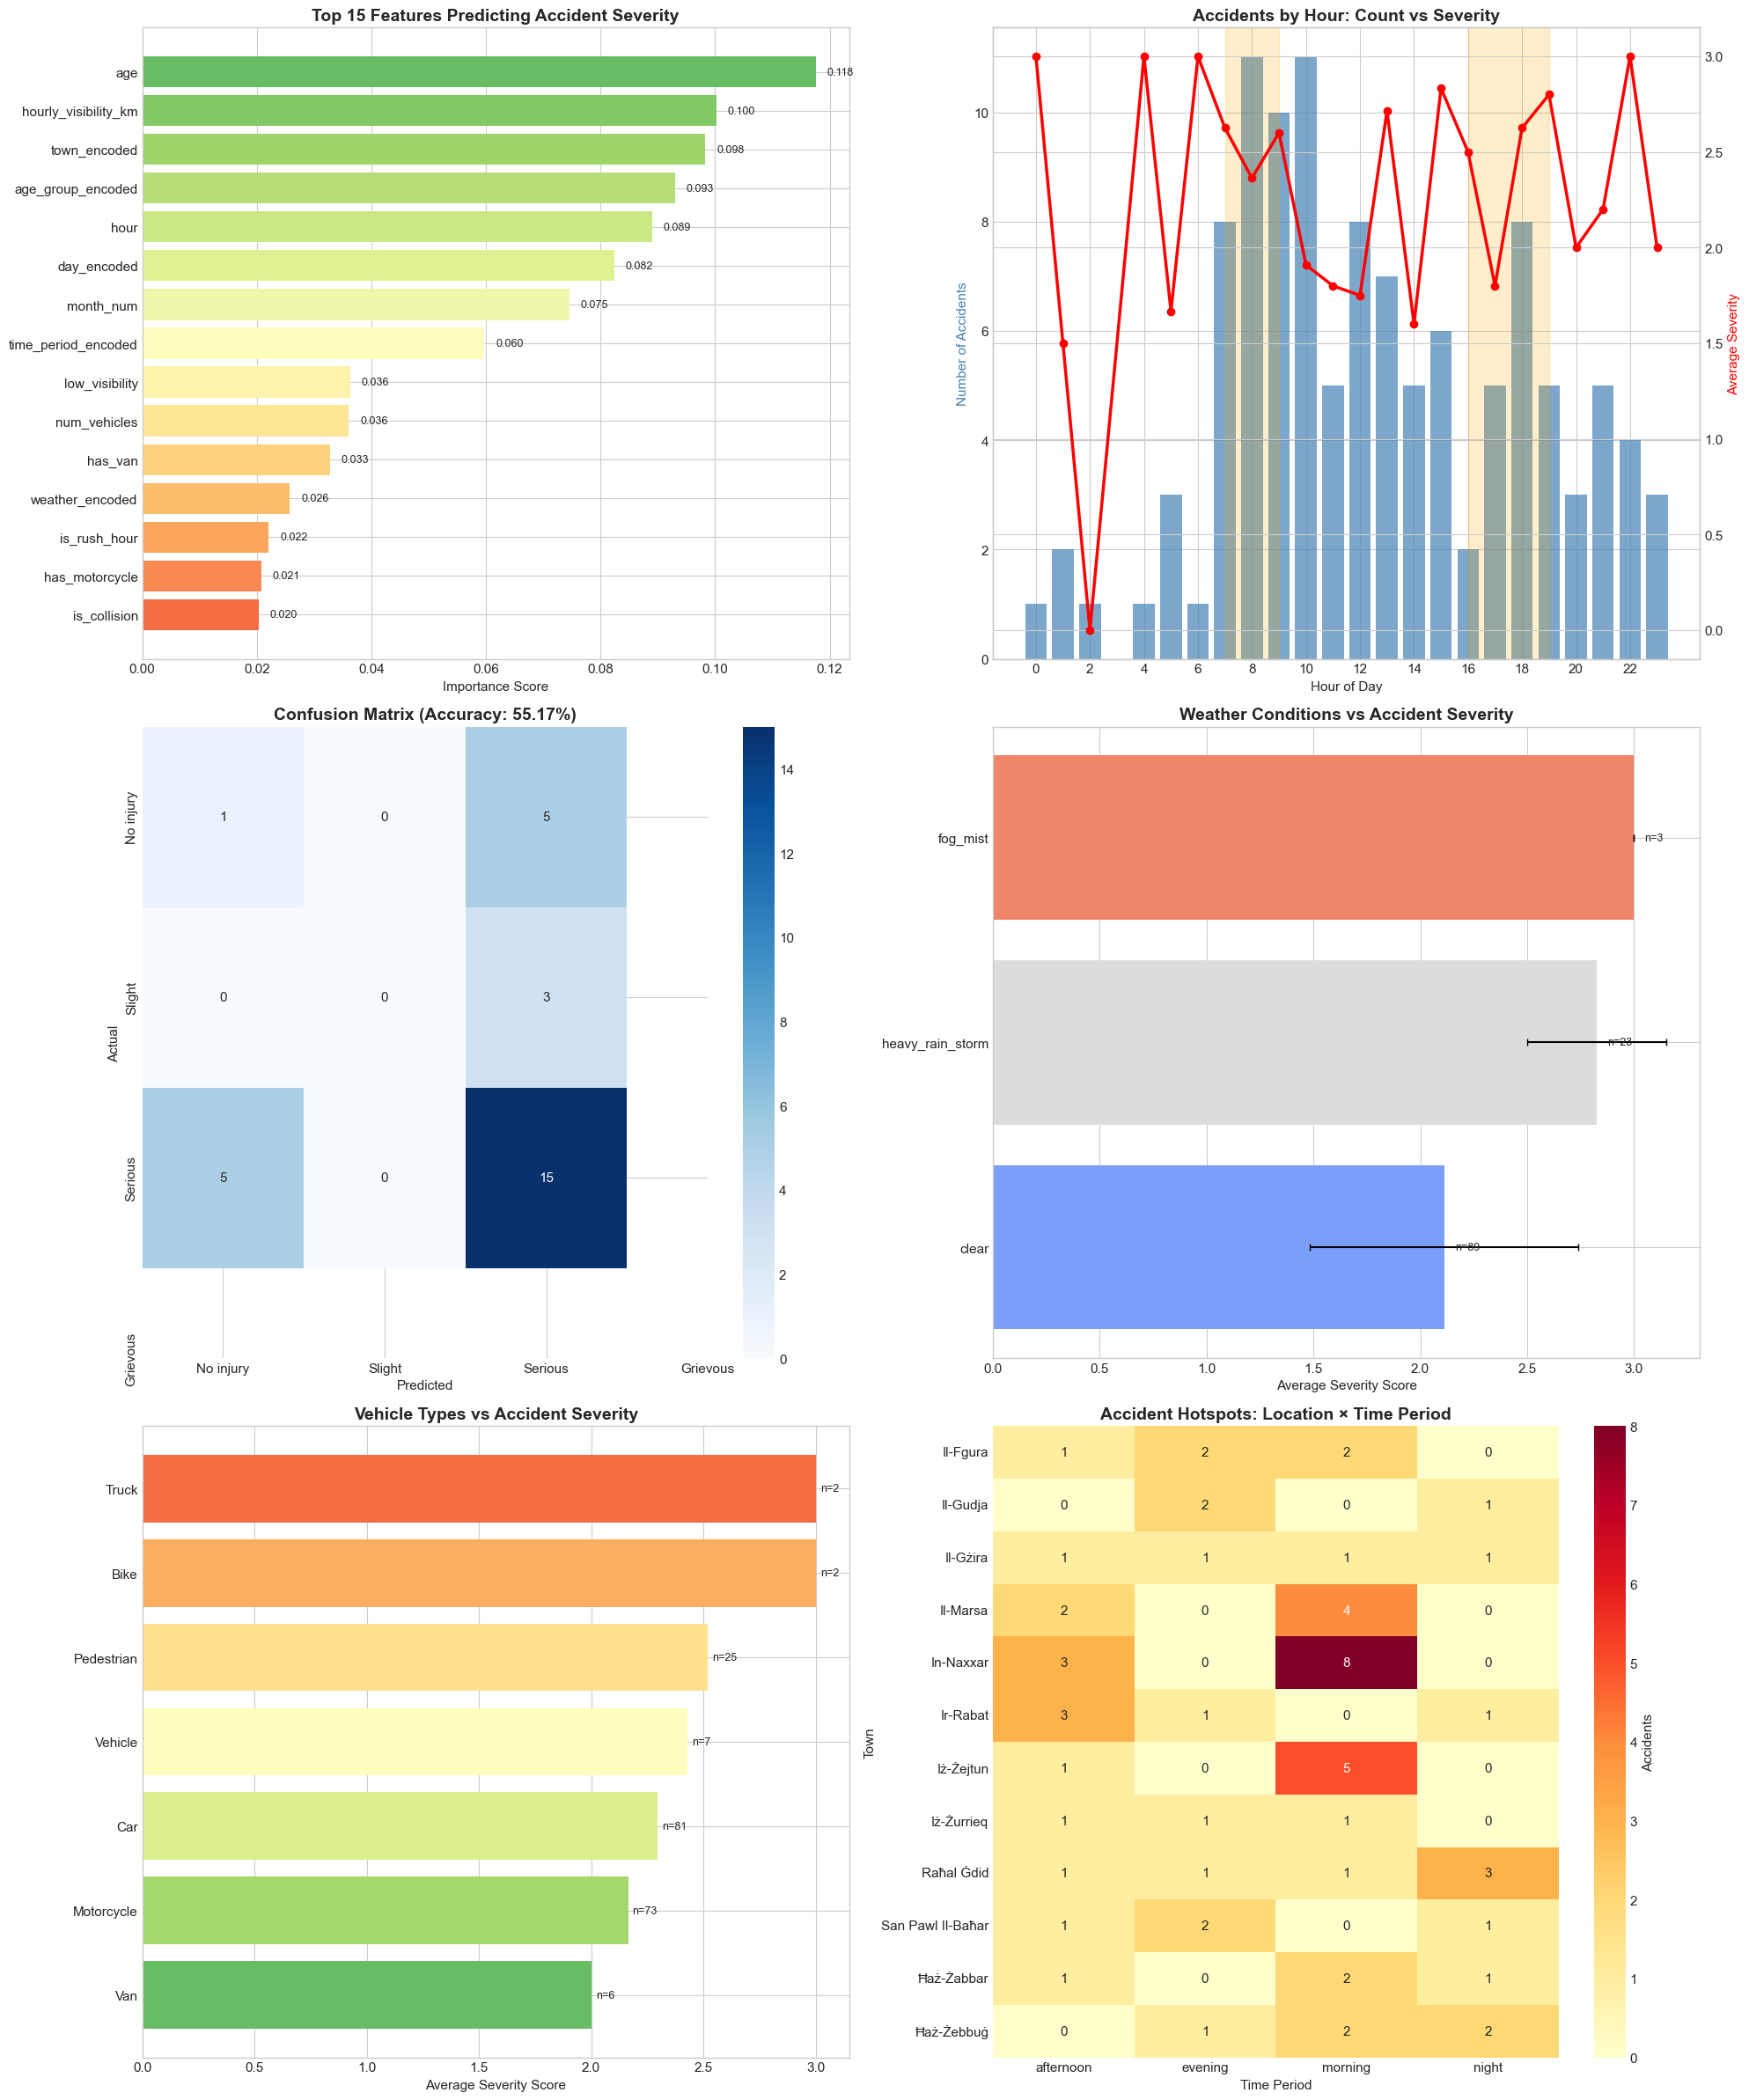

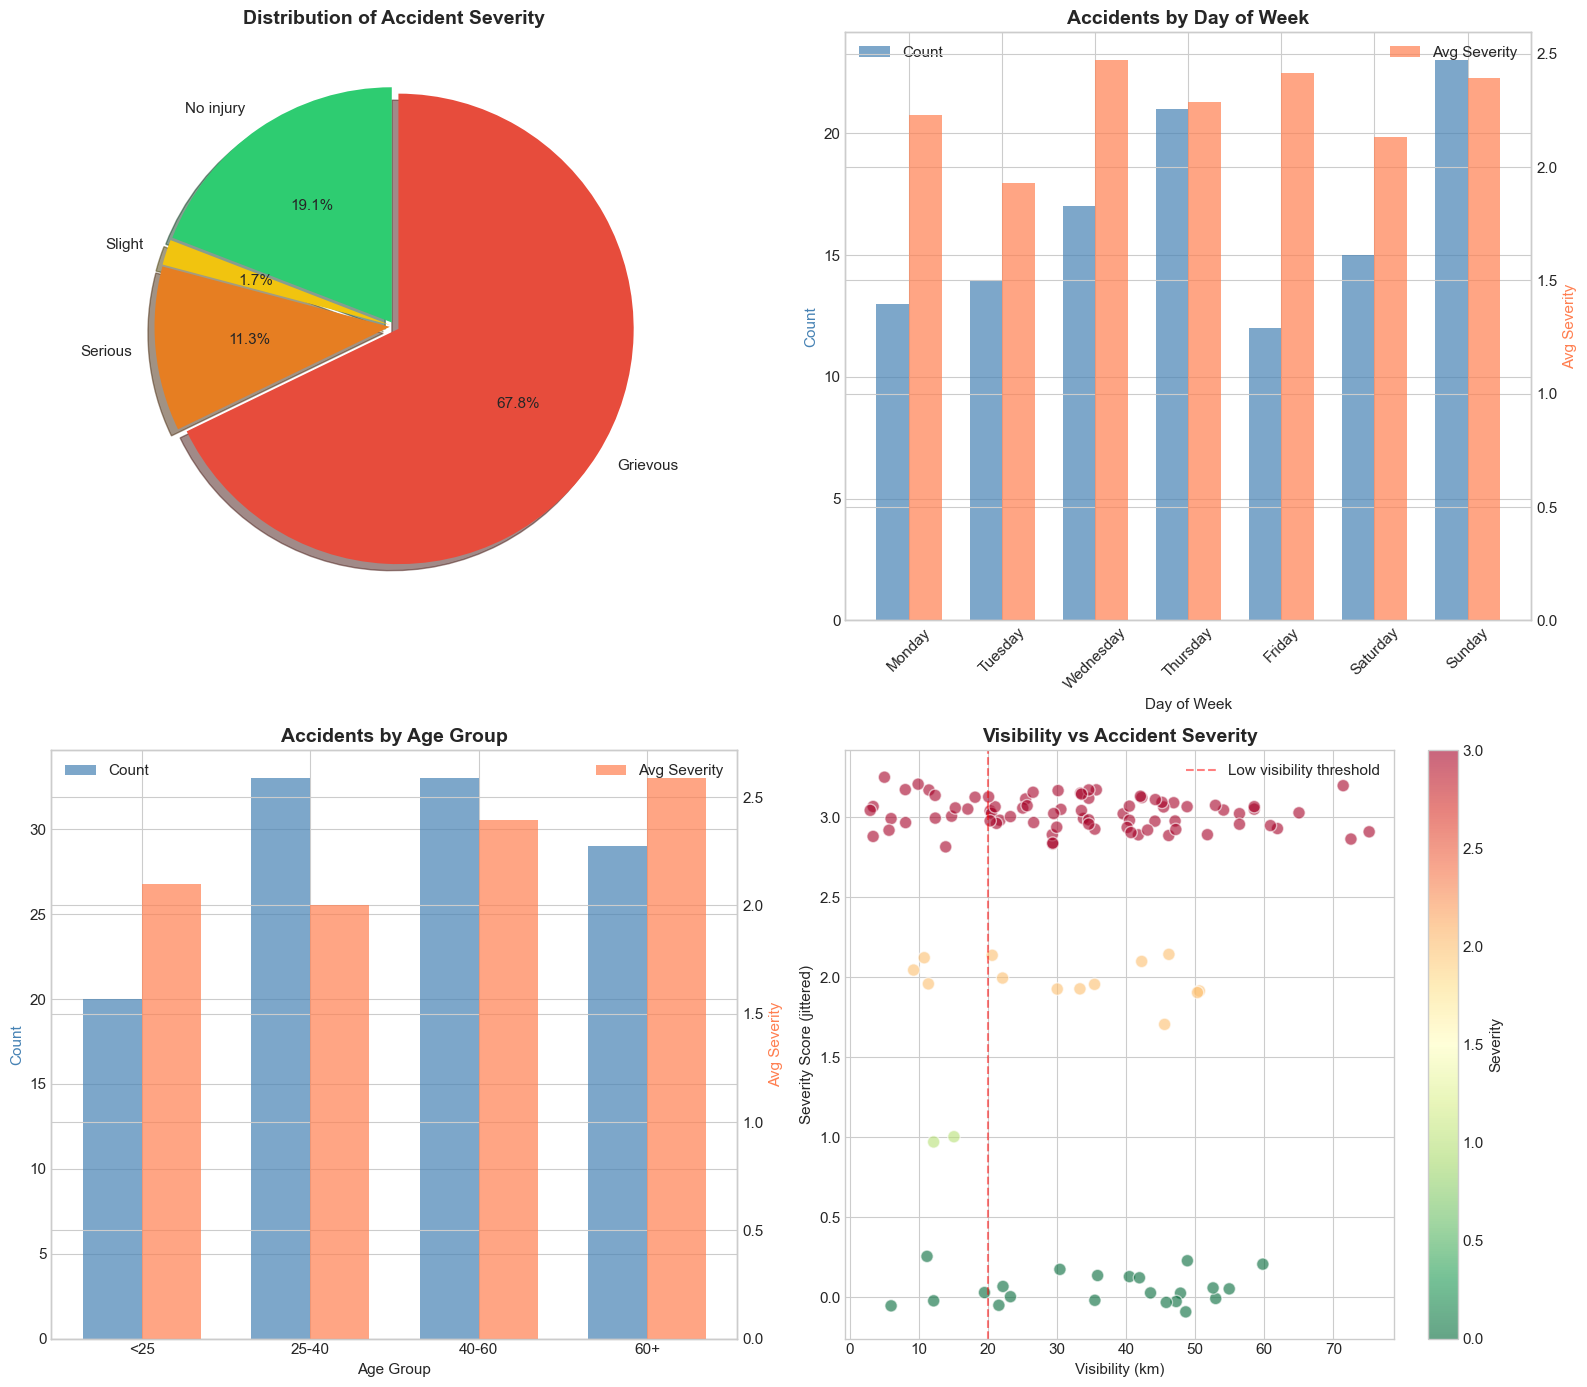

In [35]:

print("\n🔧 Feature Engineering...")

# Create a copy for modeling
model_df = df.copy()

# --- Parse vehicle types from list strings ---
def parse_list_string(list_str):
    """Parse string representation of list to actual list"""
    try:
        if pd.isna(list_str):
            return []
        return ast.literal_eval(list_str)
    except:
        return []

# Extract vehicle type features
all_vehicles = []
for v_list in df['vehicles_list']:
    all_vehicles.extend(parse_list_string(v_list))
unique_vehicles = list(set(all_vehicles))
print(f"   Vehicle types found: {unique_vehicles}")

# Create binary columns for each vehicle type
for vehicle in unique_vehicles:
    model_df[f'has_{vehicle.lower().replace(" ", "_")}'] = df['vehicles_list'].apply(
        lambda x: 1 if vehicle in parse_list_string(x) else 0
    )

# Count number of vehicles involved
model_df['num_vehicles'] = df['vehicles_list'].apply(lambda x: len(parse_list_string(x)))

# --- Time-based features ---
model_df['is_weekend'] = df['day'].isin(['Saturday', 'Sunday']).astype(int)
model_df['is_rush_hour'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9) or (16 <= x <= 19) else 0)
model_df['is_night'] = df['hour'].apply(lambda x: 1 if x >= 21 or x <= 5 else 0)

# Time period categories
def get_time_period(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

model_df['time_period'] = df['hour'].apply(get_time_period)

# --- Weather features ---
model_df['has_precipitation'] = (df['hourly_precipitation'] > 0).astype(int)
model_df['has_rain'] = ((df['hourly_rain'] > 0) | (df['hourly_showers'] > 0)).astype(int)
model_df['low_visibility'] = (df['hourly_visibility_km'] < 20).astype(int)
model_df['very_low_visibility'] = (df['hourly_visibility_km'] < 10).astype(int)

# Weather code categories (WMO codes)
def categorize_weather(code):
    if pd.isna(code):
        return 'unknown'
    code = int(code)
    if code <= 3:
        return 'clear'
    elif code <= 49:
        return 'fog_mist'
    elif code <= 69:
        return 'drizzle'
    elif code <= 79:
        return 'rain'
    elif code <= 99:
        return 'heavy_rain_storm'
    return 'unknown'

model_df['weather_category'] = df['daily_weather_code'].apply(categorize_weather)

# --- Age categories ---
def categorize_age(age):
    if pd.isna(age):
        return 'unknown'
    if age < 25:
        return 'young'
    elif age < 40:
        return 'adult'
    elif age < 60:
        return 'middle_aged'
    else:
        return 'senior'

model_df['age_group'] = df['age'].apply(categorize_age)

# --- Encode categorical variables ---
le_day = LabelEncoder()
model_df['day_encoded'] = le_day.fit_transform(df['day'])

le_town = LabelEncoder()
model_df['town_encoded'] = le_town.fit_transform(df['town'])

le_time_period = LabelEncoder()
model_df['time_period_encoded'] = le_time_period.fit_transform(model_df['time_period'])

le_weather = LabelEncoder()
model_df['weather_encoded'] = le_weather.fit_transform(model_df['weather_category'])

le_age_group = LabelEncoder()
model_df['age_group_encoded'] = le_age_group.fit_transform(model_df['age_group'])

# --- Check for collision type ---
model_df['is_collision'] = df['accident_types'].str.contains('Collision', na=False).astype(int)

# =============================================================================
# 3. PREPARE FEATURES FOR MODELING
# =============================================================================

# Select features for the model
feature_columns = [
    # Time features
    'hour', 'month_num', 'day_encoded', 'is_weekend', 'is_rush_hour', 
    'is_night', 'time_period_encoded',
    
    # Weather features
    'hourly_precipitation', 'hourly_rain', 'hourly_showers', 'daily_rain_sum',
    'hourly_visibility_km', 'has_precipitation', 'has_rain', 
    'low_visibility', 'very_low_visibility', 'weather_encoded',
    
    # Person features
    'age', 'age_group_encoded',
    
    # Location
    'town_encoded',
    
    # Vehicle features
    'num_vehicles', 'is_collision'
]

# Add vehicle type columns
vehicle_cols = [col for col in model_df.columns if col.startswith('has_')]
feature_columns.extend(vehicle_cols)

print(f"   Total features: {len(feature_columns)}")

# Prepare X and y
X = model_df[feature_columns].copy()
y = model_df['severity_score'].copy()

# Handle any missing values
X = X.fillna(X.median())

print(f"   Feature matrix shape: {X.shape}")

# =============================================================================
# 4. BUILD RANDOM FOREST MODEL
# =============================================================================

print("\n🌲 Building Random Forest Model...")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
print(f"   Training set: {len(X_train)} samples")
print(f"   Test set: {len(X_test)} samples")

# Build initial model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',  # Handle class imbalance
    random_state=42,
    n_jobs=-1
)

# Fit model
rf_model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\n   Cross-validation accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std()*2:.3f})")

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)

# =============================================================================
# 5. MODEL EVALUATION
# =============================================================================

print("\n📊 MODEL PERFORMANCE")
print("-" * 50)

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"   Accuracy: {accuracy:.3f}")
print(f"   F1-Score (weighted): {f1_weighted:.3f}")

print("\n   Classification Report:")
# Handle cases where not all classes are in test set
all_labels = [0, 1, 2, 3]
present_labels = sorted(list(set(y_test) | set(y_pred)))
label_names = {0: 'No injury', 1: 'Slight', 2: 'Serious', 3: 'Grievous'}
target_names = [label_names[l] for l in present_labels]
print(classification_report(y_test, y_pred, labels=present_labels, target_names=target_names, zero_division=0))

# =============================================================================
# 6. FEATURE IMPORTANCE ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("RESEARCH QUESTION 1: What factors predict accident severity?")
print("=" * 70)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🏆 TOP 15 MOST IMPORTANT FEATURES:")
print("-" * 50)
for i, row in feature_importance.head(15).iterrows():
    bar = "█" * int(row['importance'] * 100)
    print(f"   {row['feature']:<30} {row['importance']:.4f} {bar}")

# =============================================================================
# 7. TIME-BASED ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("RESEARCH QUESTION 2: High-risk time periods and locations")
print("=" * 70)

# Hourly distribution
print("\n⏰ ACCIDENTS BY HOUR (severity >= 2 indicates serious/grievous):")
hourly_severity = df.groupby('hour').agg({
    'severity_score': ['count', 'mean'],
}).round(2)
hourly_severity.columns = ['count', 'avg_severity']
high_risk_hours = hourly_severity.nlargest(5, 'avg_severity')
print(high_risk_hours.to_string())

# Day of week analysis
print("\n📅 ACCIDENTS BY DAY OF WEEK:")
daily_severity = df.groupby('day').agg({
    'severity_score': ['count', 'mean']
}).round(2)
daily_severity.columns = ['count', 'avg_severity']
print(daily_severity.sort_values('avg_severity', ascending=False).to_string())

# Location analysis
print("\n📍 TOP 10 HIGH-RISK LOCATIONS (by avg severity):")
location_risk = df.groupby('town').agg({
    'severity_score': ['count', 'mean', 'sum']
}).round(2)
location_risk.columns = ['accident_count', 'avg_severity', 'total_severity']
location_risk = location_risk[location_risk['accident_count'] >= 2]  # At least 2 accidents
print(location_risk.nlargest(10, 'avg_severity').to_string())

# =============================================================================
# 8. WEATHER ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("RESEARCH QUESTION 3: Weather conditions and accidents")
print("=" * 70)

print("\n🌧️ WEATHER CATEGORY ANALYSIS:")
weather_analysis = model_df.groupby('weather_category').agg({
    'severity_score': ['count', 'mean', 'std']
}).round(2)
weather_analysis.columns = ['count', 'avg_severity', 'std_severity']
print(weather_analysis.sort_values('avg_severity', ascending=False).to_string())

print("\n👁️ VISIBILITY IMPACT:")
visibility_bins = pd.cut(df['hourly_visibility_km'], bins=[0, 10, 20, 30, 50, 100], 
                         labels=['Very Poor (<10)', 'Poor (10-20)', 'Moderate (20-30)', 
                                'Good (30-50)', 'Excellent (50+)'])
vis_analysis = df.groupby(visibility_bins).agg({
    'severity_score': ['count', 'mean']
}).round(2)
vis_analysis.columns = ['count', 'avg_severity']
print(vis_analysis.to_string())

print("\n🌧️ PRECIPITATION IMPACT:")
print(f"   With precipitation: {model_df[model_df['has_precipitation']==1]['severity_score'].mean():.2f} avg severity (n={model_df['has_precipitation'].sum()})")
print(f"   No precipitation: {model_df[model_df['has_precipitation']==0]['severity_score'].mean():.2f} avg severity (n={len(model_df)-model_df['has_precipitation'].sum()})")

# =============================================================================
# 9. VEHICLE TYPE ANALYSIS
# =============================================================================

print("\n" + "=" * 70)
print("RESEARCH QUESTION 4: Vehicle types and serious injuries")
print("=" * 70)

print("\n🚗 SEVERITY BY VEHICLE TYPE INVOLVED:")
for vehicle in unique_vehicles:
    col = f'has_{vehicle.lower().replace(" ", "_")}'
    if col in model_df.columns:
        involved = model_df[model_df[col] == 1]
        not_involved = model_df[model_df[col] == 0]
        if len(involved) > 0:
            avg_sev = involved['severity_score'].mean()
            serious_pct = (involved['severity_score'] >= 2).mean() * 100
            print(f"   {vehicle:<15}: avg severity {avg_sev:.2f}, {serious_pct:.1f}% serious/grievous (n={len(involved)})")

# Collision vs non-collision
print("\n💥 COLLISION vs NON-COLLISION:")
collision = model_df[model_df['is_collision'] == 1]
non_collision = model_df[model_df['is_collision'] == 0]
print(f"   Collision: avg severity {collision['severity_score'].mean():.2f} (n={len(collision)})")
print(f"   Non-collision: avg severity {non_collision['severity_score'].mean():.2f} (n={len(non_collision)})")

# Age group analysis
print("\n👤 SEVERITY BY AGE GROUP:")
age_analysis = model_df.groupby('age_group').agg({
    'severity_score': ['count', 'mean']
}).round(2)
age_analysis.columns = ['count', 'avg_severity']
print(age_analysis.sort_values('avg_severity', ascending=False).to_string())

# =============================================================================
# 10. CREATE VISUALIZATIONS
# =============================================================================

print("\n📊 Generating visualizations...")

# Create figure with subplots
fig = plt.figure(figsize=(20, 24))

# --- Plot 1: Feature Importance ---
ax1 = fig.add_subplot(3, 2, 1)
top_features = feature_importance.head(15)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_features)))
bars = ax1.barh(range(len(top_features)), top_features['importance'].values, color=colors)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['feature'].values)
ax1.invert_yaxis()
ax1.set_xlabel('Importance Score')
ax1.set_title('Top 15 Features Predicting Accident Severity', fontsize=14, fontweight='bold')
for i, v in enumerate(top_features['importance'].values):
    ax1.text(v + 0.002, i, f'{v:.3f}', va='center', fontsize=9)

# --- Plot 2: Accidents by Hour ---
ax2 = fig.add_subplot(3, 2, 2)
hourly_data = df.groupby('hour').agg({'severity_score': ['count', 'mean']})
hourly_data.columns = ['count', 'avg_severity']
ax2_twin = ax2.twinx()

bars = ax2.bar(hourly_data.index, hourly_data['count'], color='steelblue', alpha=0.7, label='Count')
line = ax2_twin.plot(hourly_data.index, hourly_data['avg_severity'], color='red', 
                      linewidth=2.5, marker='o', markersize=6, label='Avg Severity')
ax2.set_xlabel('Hour of Day')
ax2.set_ylabel('Number of Accidents', color='steelblue')
ax2_twin.set_ylabel('Average Severity', color='red')
ax2.set_title('Accidents by Hour: Count vs Severity', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24, 2))
ax2.axvspan(7, 9, alpha=0.2, color='orange', label='Morning Rush')
ax2.axvspan(16, 19, alpha=0.2, color='orange', label='Evening Rush')

# --- Plot 3: Confusion Matrix ---
ax3 = fig.add_subplot(3, 2, 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3,
            xticklabels=['No injury', 'Slight', 'Serious', 'Grievous'],
            yticklabels=['No injury', 'Slight', 'Serious', 'Grievous'])
ax3.set_xlabel('Predicted')
ax3.set_ylabel('Actual')
ax3.set_title(f'Confusion Matrix (Accuracy: {accuracy:.2%})', fontsize=14, fontweight='bold')

# --- Plot 4: Weather Impact ---
ax4 = fig.add_subplot(3, 2, 4)
weather_plot = model_df.groupby('weather_category')['severity_score'].agg(['mean', 'count', 'std'])
weather_plot = weather_plot.sort_values('mean', ascending=True)
colors_weather = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(weather_plot)))
bars = ax4.barh(weather_plot.index, weather_plot['mean'], xerr=weather_plot['std']/2, 
                color=colors_weather, capsize=3)
ax4.set_xlabel('Average Severity Score')
ax4.set_title('Weather Conditions vs Accident Severity', fontsize=14, fontweight='bold')
for i, (idx, row) in enumerate(weather_plot.iterrows()):
    ax4.text(row['mean'] + 0.05, i, f'n={int(row["count"])}', va='center', fontsize=9)

# --- Plot 5: Vehicle Type Analysis ---
ax5 = fig.add_subplot(3, 2, 5)
vehicle_severity = []
for vehicle in unique_vehicles:
    col = f'has_{vehicle.lower().replace(" ", "_")}'
    if col in model_df.columns:
        involved = model_df[model_df[col] == 1]
        if len(involved) >= 2:
            vehicle_severity.append({
                'vehicle': vehicle,
                'avg_severity': involved['severity_score'].mean(),
                'count': len(involved),
                'serious_pct': (involved['severity_score'] >= 2).mean() * 100
            })

vehicle_df = pd.DataFrame(vehicle_severity).sort_values('avg_severity', ascending=True)
colors_vehicle = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(vehicle_df)))
bars = ax5.barh(vehicle_df['vehicle'], vehicle_df['avg_severity'], color=colors_vehicle)
ax5.set_xlabel('Average Severity Score')
ax5.set_title('Vehicle Types vs Accident Severity', fontsize=14, fontweight='bold')
for i, row in vehicle_df.iterrows():
    ax5.text(row['avg_severity'] + 0.02, list(vehicle_df['vehicle']).index(row['vehicle']), 
             f"n={row['count']}", va='center', fontsize=9)

# --- Plot 6: Location Heatmap (Top 15 locations) ---
ax6 = fig.add_subplot(3, 2, 6)
location_time = model_df.groupby(['town', 'time_period']).size().unstack(fill_value=0)
top_towns = model_df['town'].value_counts().head(12).index
location_time = location_time.loc[location_time.index.isin(top_towns)]
sns.heatmap(location_time, cmap='YlOrRd', annot=True, fmt='d', ax=ax6, cbar_kws={'label': 'Accidents'})
ax6.set_title('Accident Hotspots: Location × Time Period', fontsize=14, fontweight='bold')
ax6.set_xlabel('Time Period')
ax6.set_ylabel('Town')

plt.tight_layout()

# =============================================================================
# Additional Analysis Plots
# =============================================================================

fig2, axes = plt.subplots(2, 2, figsize=(16, 14))

# Plot 1: Severity distribution
ax1 = axes[0, 0]
severity_counts = df['severity_score'].value_counts().sort_index()
colors_sev = ['#2ecc71', '#f1c40f', '#e67e22', '#e74c3c']
wedges, texts, autotexts = ax1.pie(severity_counts.values, labels=['No injury', 'Slight', 'Serious', 'Grievous'],
                                   autopct='%1.1f%%', colors=colors_sev, explode=[0.02]*4,
                                   shadow=True, startangle=90)
ax1.set_title('Distribution of Accident Severity', fontsize=14, fontweight='bold')

# Plot 2: Day of week
ax2 = axes[0, 1]
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = df.groupby('day').agg({'severity_score': ['count', 'mean']})
day_data.columns = ['count', 'avg_severity']
day_data = day_data.reindex(day_order)
x = np.arange(len(day_order))
width = 0.35
bars1 = ax2.bar(x - width/2, day_data['count'], width, label='Count', color='steelblue', alpha=0.7)
ax2_twin = ax2.twinx()
bars2 = ax2_twin.bar(x + width/2, day_data['avg_severity'], width, label='Avg Severity', color='coral', alpha=0.7)
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Count', color='steelblue')
ax2_twin.set_ylabel('Avg Severity', color='coral')
ax2.set_xticks(x)
ax2.set_xticklabels(day_order, rotation=45)
ax2.set_title('Accidents by Day of Week', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left')
ax2_twin.legend(loc='upper right')

# Plot 3: Age vs Severity
ax3 = axes[1, 0]
age_sev = df.groupby(pd.cut(df['age'], bins=[0, 25, 40, 60, 100], 
                             labels=['<25', '25-40', '40-60', '60+'])).agg({
    'severity_score': ['count', 'mean']
})
age_sev.columns = ['count', 'avg_severity']
x = np.arange(len(age_sev))
width = 0.35
bars1 = ax3.bar(x - width/2, age_sev['count'], width, label='Count', color='steelblue', alpha=0.7)
ax3_twin = ax3.twinx()
bars2 = ax3_twin.bar(x + width/2, age_sev['avg_severity'], width, label='Avg Severity', color='coral', alpha=0.7)
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Count', color='steelblue')
ax3_twin.set_ylabel('Avg Severity', color='coral')
ax3.set_xticks(x)
ax3.set_xticklabels(age_sev.index)
ax3.set_title('Accidents by Age Group', fontsize=14, fontweight='bold')
ax3.legend(loc='upper left')
ax3_twin.legend(loc='upper right')

# Plot 4: Visibility vs Severity scatter
ax4 = axes[1, 1]
scatter = ax4.scatter(df['hourly_visibility_km'], df['severity_score'] + np.random.normal(0, 0.1, len(df)),
                      c=df['severity_score'], cmap='RdYlGn_r', alpha=0.6, s=80, edgecolors='white')
ax4.set_xlabel('Visibility (km)')
ax4.set_ylabel('Severity Score (jittered)')
ax4.set_title('Visibility vs Accident Severity', fontsize=14, fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax4)
cbar.set_label('Severity')
ax4.axvline(x=20, color='red', linestyle='--', alpha=0.5, label='Low visibility threshold')
ax4.legend()

plt.tight_layout()

# =============================================================================
# 11. SUMMARY AND KEY FINDINGS
# =============================================================================

print("\n" + "=" * 70)
print("📋 EXECUTIVE SUMMARY - KEY FINDINGS")
print("=" * 70)

print("\n1️⃣  FACTORS PREDICTING ACCIDENT SEVERITY:")
print("   Top predictors from Random Forest analysis:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   • {row['feature']}: {row['importance']:.3f}")

print("\n2️⃣  HIGH-RISK TIME PERIODS:")
rush_hour_accidents = model_df[model_df['is_rush_hour'] == 1]
non_rush = model_df[model_df['is_rush_hour'] == 0]
print(f"   • Rush hour (7-9am, 4-7pm) avg severity: {rush_hour_accidents['severity_score'].mean():.2f}")
print(f"   • Non-rush hour avg severity: {non_rush['severity_score'].mean():.2f}")
highest_risk_hour = hourly_severity.nlargest(1, 'avg_severity')
print(f"   • Highest risk hour: {highest_risk_hour.index[0]}:00 (avg severity: {highest_risk_hour['avg_severity'].values[0]:.2f})")

print("\n3️⃣  HIGH-RISK LOCATIONS:")
top_3_locations = location_risk.nlargest(3, 'avg_severity')
for town, row in top_3_locations.iterrows():
    print(f"   • {town}: {row['avg_severity']:.2f} avg severity ({int(row['accident_count'])} accidents)")

print("\n4️⃣  WEATHER CONDITIONS:")
weather_sorted = model_df.groupby('weather_category')['severity_score'].mean().sort_values(ascending=False)
print(f"   • Highest risk weather: {weather_sorted.index[0]} ({weather_sorted.values[0]:.2f} avg severity)")
print(f"   • Lowest risk weather: {weather_sorted.index[-1]} ({weather_sorted.values[-1]:.2f} avg severity)")

print("\n5️⃣  VEHICLE TYPES ASSOCIATED WITH SERIOUS INJURIES:")
vehicle_df_sorted = pd.DataFrame(vehicle_severity).sort_values('serious_pct', ascending=False)
for _, row in vehicle_df_sorted.head(3).iterrows():
    print(f"   • {row['vehicle']}: {row['serious_pct']:.1f}% result in serious/grievous injuries")

print("\n" + "=" * 70)
print(f"Model Performance: {accuracy:.1%} accuracy, {f1_weighted:.3f} F1-score")
print(f"Cross-validation: {cv_scores.mean():.1%} (+/- {cv_scores.std()*2:.1%})")
print("=" * 70)

# Save feature importance to CSV
feature_importance.to_csv('../data/feature_importance.csv', index=False)
print("\n✅ Analysis complete! Files saved:")
print("   • accident_analysis_visualizations.png")
print("   • accident_analysis_additional.png")
print("   • feature_importance.csv")